<a href="https://colab.research.google.com/github/Kggzzz/Project_2021_matchingcolor/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle

In [36]:
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

##Prepare data 

In [4]:
path = '/content/drive/My Drive/shadeimg/SVM shade'

In [5]:
os.listdir(path)

['DD.xlsx',
 'CC.xlsx',
 'BB.xlsx',
 'Shade_AA.xlsx',
 'Shade_CC.xlsx',
 'Shade_DD.xlsx',
 'Shade_BB.xlsx',
 'AA.xlsx',
 'AA_2.xlsx',
 'Shad_A.xlsx',
 'Shad_B.xlsx',
 'Shad_C.xlsx',
 'Shad_D.xlsx',
 'Setting4.xlsx',
 'Color-checkerAA.xlsx',
 'Color-checkerBB.xlsx',
 'Color-checkerCC.xlsx',
 'Setting2.xlsx',
 'D3set51.csv',
 'Setting1.xlsx',
 'CheckerDD.xlsx',
 'Setting3.xlsx',
 'Setting6.xlsx',
 'Setting5.xlsx',
 'checkerShad_A .xlsx',
 'checkerShad_B.xlsx',
 'checkerShad_C.xlsx',
 'D3Set5-61.xlsx',
 'checkerShad_D.xlsx',
 'Color-checkerDD.xlsx',
 'Datapoint_1.xlsx',
 'Datapoint_2.xlsx',
 'Datapoint_3.xlsx',
 'Datapoint_4.xlsx',
 'Datapoint_6.xlsx',
 'Datapoint_5.xlsx']

In [6]:
Set1 = os.path.join(path,'Datapoint_1.xlsx')
print(Set1)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_1.xlsx


In [7]:
Set2 = os.path.join(path,'Datapoint_2.xlsx')
print(Set2)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_2.xlsx


In [8]:
Set3 = os.path.join(path,'Datapoint_3.xlsx')
print(Set3)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_3.xlsx


In [9]:
Set4 = os.path.join(path,'Datapoint_4.xlsx')
print(Set4)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_4.xlsx


In [10]:
Set5 = os.path.join(path,'Datapoint_5.xlsx')
print(Set5)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_5.xlsx


In [11]:
Set6 = os.path.join(path,'Datapoint_6.xlsx')
print(Set6)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_6.xlsx


##train 

In [13]:
with open('Model_A2_rgb2.pkl', 'rb') as pickle_file :
    new_data = pickle.load(pickle_file)

In [14]:
table_A2Set1 = pd.read_excel(Set1, sheet_name='A2_1')
table_A2Set2 = pd.read_excel(Set2, sheet_name='A2_2')
table_A2Set3 = pd.read_excel(Set3, sheet_name='A2_3')
table_A2Set4 = pd.read_excel(Set4, sheet_name='A2_4')
table_A2Set5 = pd.read_excel(Set5, sheet_name='A2_5')
table_A2Set6 = pd.read_excel(Set6, sheet_name='A2_6')

In [59]:
table_A2Set6

,R-ref,G-ref,B-ref,R-Shad,G-Shad,B-Shad,H-ref,S-ref,V-ref,H-Shad,S-Shad,V-Shad,Setting,Ref,Shad,Img
0,237.162893,234.868679,205.338852,231.399318,233.423667,212.102833,28.038877,34.378541,237.240484,33.596948,23.320185,233.424154,Set6,A2,A1,5E9854E6-E73F-4634-B836-4C9ED89FD883.png
1,236.810243,234.806428,205.561399,231.608879,233.665774,212.158023,28.296161,33.804480,236.866488,33.760003,23.504505,233.667397,Set6,A2,A1,EE39414A-F794-49DA-BF45-8E94A9984753.png
2,237.115981,235.015827,205.429348,231.106810,233.214674,211.803506,28.233341,34.251765,237.209317,33.822823,23.451749,233.215080,Set6,A2,A1,C369F1C9-7A1D-4BBF-8F6B-DA937D120A2B.png
3,236.954062,234.870546,205.320510,231.426264,233.535427,212.138706,28.145930,34.203068,237.018262,33.749533,23.382112,233.536077,Set6,A2,A1,6B5E313E-647E-4399-86AA-359DAB736EDE.png
4,236.960961,234.713984,204.943998,231.136434,233.188621,211.709277,27.960312,34.590780,237.009658,33.632092,23.502557,233.189270,Set6,A2,A1,13216B76-7C70-476E-8151-9CD34B98173D.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,236.582339,233.523253,202.580554,225.683467,224.001217,176.487866,26.940914,36.718935,236.582339,29.007792,55.599545,225.683467,Set6,A2,D4,698DEBFB-68A1-46B1-B404-A689504B9D41.png
796,237.027352,233.977437,203.106647,226.039688,224.594919,176.743040,26.950085,36.530963,237.027352,29.059167,55.635013,226.039688,Set6,A2,D4,402E5CB5-10DD-4C36-B760-CFD2237DD396.png
797,237.001867,234.153640,203.055921,226.025972,224.720802,176.720315,27.151773,36.555880,237.001867,29.141547,55.668209,226.025972,Set6,A2,D4,1D781982-AADE-4B07-ACB8-9ED4B2B81EE3.png
798,236.741904,233.941076,202.763169,225.862024,224.522847,176.651489,27.199172,36.626735,236.741904,29.124828,55.600763,225.862187,Set6,A2,D4,66376937-0F74-4311-8740-03BE69BE6C9F.png


In [15]:
RGB_A2_Set1 = table_A2Set1

In [16]:
RGB_A2_Set2 = table_A2Set2

In [17]:
RGB_A2_Set3 = table_A2Set3

In [18]:
RGB_A2_Set4 = table_A2Set4

In [19]:
RGB_A2_Set6 = table_A2Set6

In [20]:
RGB_A2_concat = pd.concat([RGB_A2_Set1,RGB_A2_Set2,RGB_A2_Set3,RGB_A2_Set4,RGB_A2_Set6])

In [21]:
RGB_A2_concat0 = RGB_A2_concat.drop(['H-ref','S-ref','V-ref','H-Shad','S-Shad','V-Shad','Setting','Ref','Shad','Img'], axis=1)

In [22]:
RGB_A2_s5 = table_A2Set5.drop(['H-ref','S-ref','V-ref','H-Shad','S-Shad','V-Shad','Setting','Ref','Shad','Img'], axis=1)

In [23]:
X_test_A2_RGB_s5 = np.array(RGB_A2_s5)

In [24]:
y_A2_RGB_s5 =  table_A2Set5.iloc[:,14:15]

In [25]:
y_test_A2_RGB_s5 = np.array(y_A2_RGB_s5)

In [60]:
y_test = np.array(y_A2_RGB_s5)

In [26]:
X_train_A2_RGB_s5 = np.array(RGB_A2_concat0)

In [27]:
y_train_A2RGB_s5 = RGB_A2_concat.iloc[:,14:15]

In [30]:
y_test_A2_RGB_s5 = np.array(table_A2Set5['Shad'])

In [31]:
y_test_A2_RGB_s5.shape = (len(y_test_A2_RGB_s5),)   

In [37]:
le_Dense = LabelEncoder() 

In [38]:
y_test_A2_RGB_s5 = le_Dense.fit_transform(y_test_A2_RGB_s5) 

In [39]:
y_test_A2_RGB_s5 = to_categorical(y_test_A2_RGB_s5, num_classes=16)

In [41]:
y_pred_A2_RGB_s5 = new_data.predict(X_test_A2_RGB_s5)

In [46]:
y_pred2_A2_RGB_s5 = le_Dense.fit_transform(y_pred_A2_RGB_s5) 

In [47]:
y_pred2_A2_RGB_s5 = to_categorical(y_pred2_A2_RGB_s5, num_classes=16)

##confusion

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [49]:
y_pred2_A2_RGB_s5.ndim

2

In [ ]:
y_test_A2_RGB_s5.shape = (len(y_test_A2_RGB_s5),1)  

In [50]:
y_test_A2_RGB_s5.ndim

2

Confusion matrix, without normalization
[[ 0  0  0  0  0 42  0  0  0  8  0  0  0  0  0  0]
 [ 3  2  3  0  0  0 18  0  0 24  0  0  0  0  0  0]
 [ 0  5 38  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0 15  8  0  0  0  0  0  7  0]
 [ 0  0  0  0 40  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0 18  2  0  7  0  0  0  0 10  0]
 [ 0  0  4  1  0  0  0 45  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0 25 13  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  8  0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  1 34  0  0 10  1  1]
 [ 0  0  0  0  4  0  0 12  0  0 34  0  0  0  0  0]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.   0.84 0.   0.   0.   0.16 0.   0.   0.   0.
  0.   0.  ]
 [0.06 0.04 0.06 0.   0.   0.   

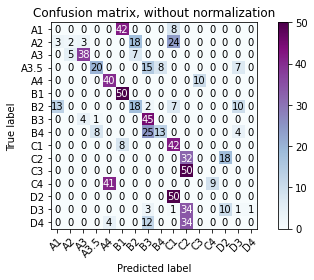

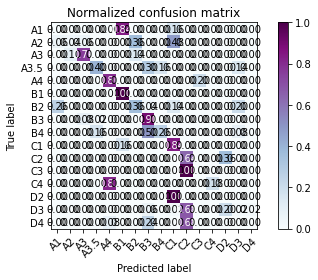

In [76]:
y_pred = y_pred2_A2_RGB_s5.argmax(axis=1)          #ค่า predict 
y_true  = y_test_A2_RGB_s5.argmax(axis=1)
class_names = le_Dense.classes_                          # ชื่อคลาสว่ามีไรบ้าง --> ['Abnormal' , 'Normal]


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [71]:
y_pred = y_pred2_A2_RGB_s5.argmax(axis=1)          #ค่า predict 
y_true  = y_test_A2_RGB_s5.argmax(axis=1)
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  0,  0,  0, 42,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  3,  0,  0,  0, 18,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 0,  5, 38,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0, 15,  8,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  0, 18,  2,  0,  7,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  4,  1,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0, 25, 13,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50,  0,